# Adult comparison

Comparing the results on the Attacks on Adult using the `Soft Voting Classifier`

In [1]:
from pathlib import Path
import sys
from numba import njit

UTILS_RELATIVE_PATH = "../../../../"
sys.path.append(UTILS_RELATIVE_PATH)

MLEM_RELATIVE_PATH = "../../../../.."
sys.path.append(MLEM_RELATIVE_PATH)

LIME_RELATIVE_PATH = "../../../../../lime/"
sys.path.append(LIME_RELATIVE_PATH)

import logging
logging.disable('DEBUG')

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme()
import numpy as np
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from mlem.ensemble import SoftVotingClassifier
from utils.attack_evaluation import evaluate_attack
from utils.models import load_pickle_bz2
from utils.dataloading.attack_models import load_attack_models

# Loading the Adult data

In [3]:
from utils.dataloading.adult import load_adult_data, load_adult_randomforest # type: ignore

BB = load_adult_randomforest()
BB_DATA = load_adult_data()

print(classification_report(BB_DATA['y_test'], BB.predict(BB_DATA['X_test'])))

              precision    recall  f1-score   support

           0       0.88      0.95      0.91      8157
           1       0.79      0.61      0.69      2690

    accuracy                           0.86     10847
   macro avg       0.84      0.78      0.80     10847
weighted avg       0.86      0.86      0.86     10847



##### Data: `Lime Generated` Attack: `Lime Generated` Explainer: `Decision Tree` Filter: `False`
Here the attack dataset is the same used to train the Decision Trees

In [4]:
PATH = Path('../../decision_tree_dataset_no3std/adult/experiment_output/')
assert PATH.exists()

In [5]:
attack_0, attack_1, instances = load_attack_models(PATH)

In [6]:
ensemble0 = SoftVotingClassifier(attack_0)
ensemble1 = SoftVotingClassifier(attack_1)

report full
              precision    recall  f1-score   support

          in       0.70      0.91      0.79     25308
         out       0.30      0.09      0.14     10847

    accuracy                           0.66     36155
   macro avg       0.50      0.50      0.47     36155
weighted avg       0.58      0.66      0.60     36155


Class 0
              precision    recall  f1-score   support

          in       0.70      0.96      0.81     20353
         out       0.28      0.03      0.06      8766

    accuracy                           0.68     29119
   macro avg       0.49      0.50      0.44     29119
weighted avg       0.57      0.68      0.58     29119


Class 1
              precision    recall  f1-score   support

          in       0.71      0.68      0.69      4955
         out       0.31      0.34      0.32      2081

    accuracy                           0.58      7036
   macro avg       0.51      0.51      0.51      7036
weighted avg       0.59      0.58      0.58 

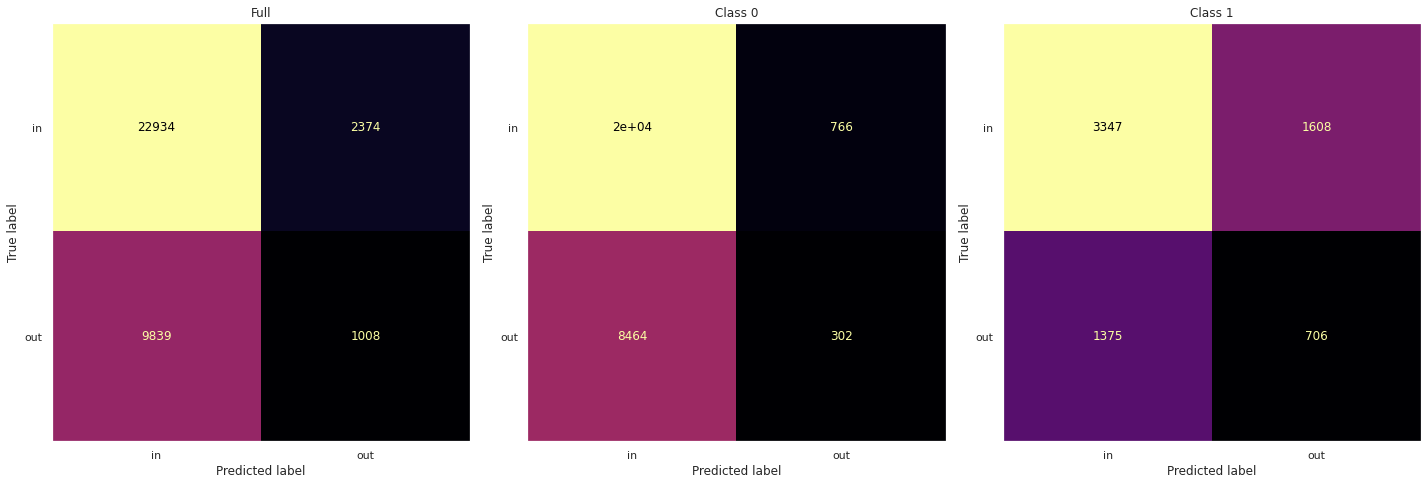

In [7]:
evaluate_attack(ensemble0, ensemble1, BB, BB_DATA)

##### Data: `Lime Generated` Attack: `Lime Generated` Explainer: `Decision Tree` Filter: `True`

In [8]:
PATH = Path('../../decision_tree_dataset/adult/experiment_output/')
assert PATH.exists()

In [9]:
attack_0, attack_1, instances = load_attack_models(PATH)

In [10]:
ensemble0 = SoftVotingClassifier(attack_0)
ensemble1 = SoftVotingClassifier(attack_1)

report full
              precision    recall  f1-score   support

          in       0.70      0.18      0.29     25308
         out       0.30      0.81      0.44     10847

    accuracy                           0.37     36155
   macro avg       0.50      0.50      0.37     36155
weighted avg       0.58      0.37      0.34     36155


Class 0
              precision    recall  f1-score   support

          in       0.69      0.16      0.26     20353
         out       0.30      0.84      0.44      8766

    accuracy                           0.36     29119
   macro avg       0.50      0.50      0.35     29119
weighted avg       0.57      0.36      0.31     29119


Class 1
              precision    recall  f1-score   support

          in       0.71      0.29      0.41      4955
         out       0.30      0.72      0.42      2081

    accuracy                           0.42      7036
   macro avg       0.51      0.51      0.42      7036
weighted avg       0.59      0.42      0.42 

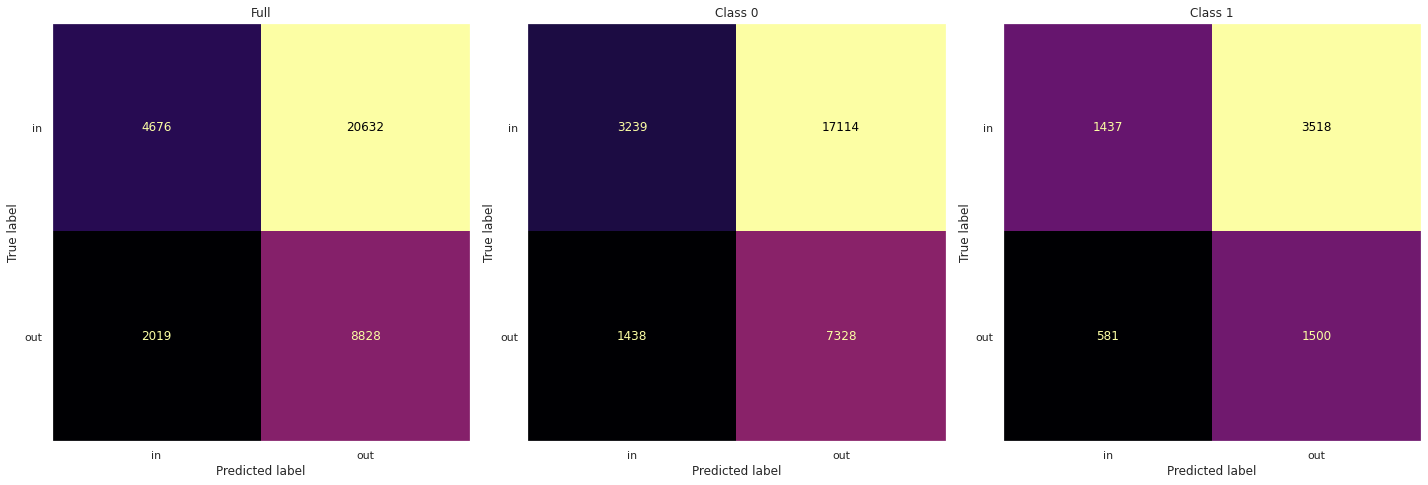

In [11]:
evaluate_attack(ensemble0, ensemble1, BB, BB_DATA)

##### Data: `Statistical` on `Black Box Train` Attack: `Statistical` Explainer: `Decision Tree` Filter: `False`
Here the attack dataset is a newly generated statistical one, not the same used to create the `DTs`

In [12]:
PATH = Path('../../statistical_no3std/adult/experiment_output/')
assert PATH.exists()

In [13]:
attack_0, attack_1, instances = load_attack_models(PATH)

In [14]:
ensemble0 = SoftVotingClassifier(attack_0)
ensemble1 = SoftVotingClassifier(attack_1)

report full
              precision    recall  f1-score   support

          in       0.70      0.82      0.75     25308
         out       0.30      0.18      0.22     10847

    accuracy                           0.63     36155
   macro avg       0.50      0.50      0.49     36155
weighted avg       0.58      0.63      0.59     36155


Class 0
              precision    recall  f1-score   support

          in       0.70      0.94      0.80     20353
         out       0.30      0.06      0.11      8766

    accuracy                           0.67     29119
   macro avg       0.50      0.50      0.45     29119
weighted avg       0.58      0.67      0.59     29119


Class 1
              precision    recall  f1-score   support

          in       0.70      0.33      0.45      4955
         out       0.29      0.65      0.40      2081

    accuracy                           0.43      7036
   macro avg       0.49      0.49      0.43      7036
weighted avg       0.58      0.43      0.44 

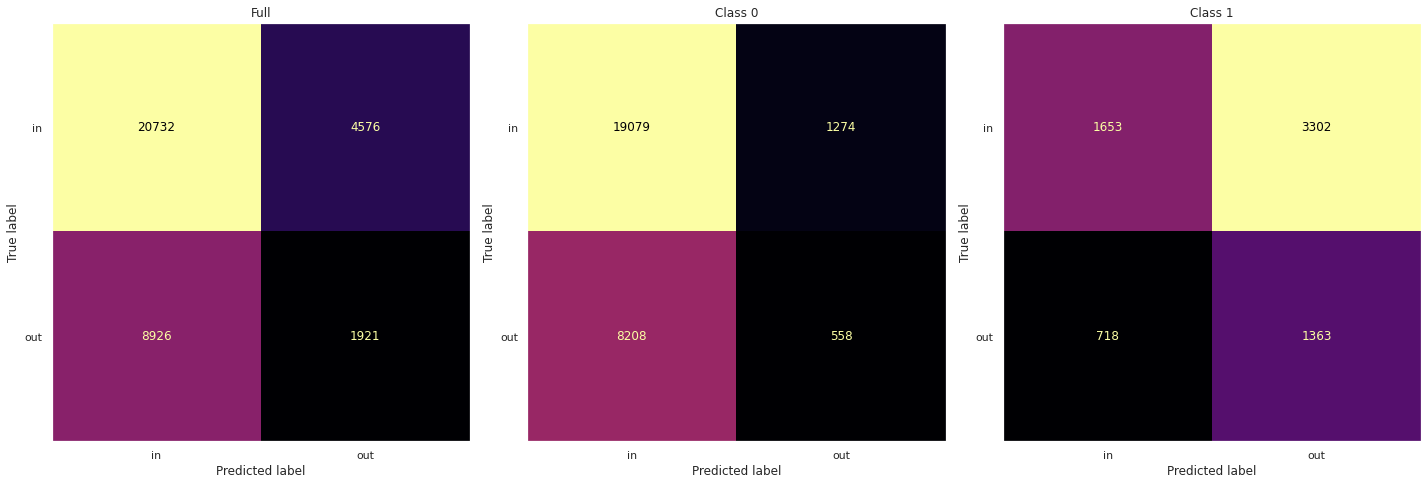

In [15]:
evaluate_attack(ensemble0, ensemble1, BB, BB_DATA)

##### Data: `Statistical` on `Black Box Train` Attack: `Statistical` Explainer: `Decision Tree` Filter: `True`

Here the attack dataset is a newly generated statistical one, not the same used to create the `DTs`

In [16]:
PATH = Path('../../statistical/adult/experiment_output/')
assert PATH.exists()

In [17]:
attack_0, attack_1, instances = load_attack_models(PATH)

In [18]:
ensemble0 = SoftVotingClassifier(attack_0)
ensemble1 = SoftVotingClassifier(attack_1)

report full
              precision    recall  f1-score   support

          in       0.70      0.95      0.81     25308
         out       0.31      0.05      0.09     10847

    accuracy                           0.68     36155
   macro avg       0.50      0.50      0.45     36155
weighted avg       0.58      0.68      0.59     36155


Class 0
              precision    recall  f1-score   support

          in       0.70      0.97      0.81     20353
         out       0.30      0.04      0.06      8766

    accuracy                           0.69     29119
   macro avg       0.50      0.50      0.44     29119
weighted avg       0.58      0.69      0.59     29119


Class 1
              precision    recall  f1-score   support

          in       0.71      0.89      0.79      4955
         out       0.31      0.12      0.17      2081

    accuracy                           0.66      7036
   macro avg       0.51      0.50      0.48      7036
weighted avg       0.59      0.66      0.60 

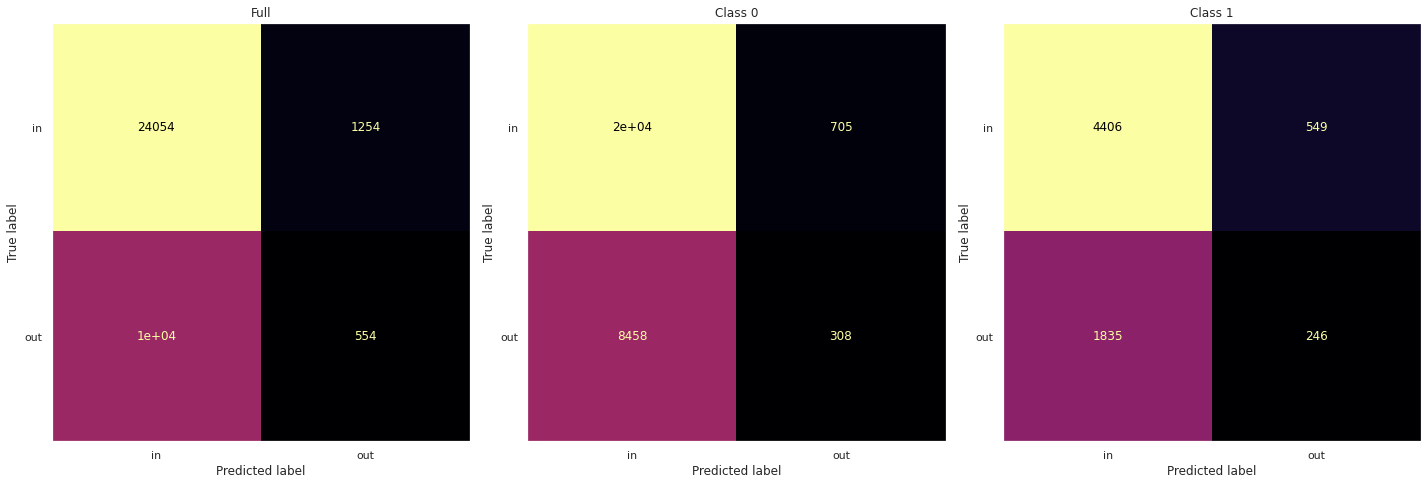

In [19]:
evaluate_attack(ensemble0, ensemble1, BB, BB_DATA)

##### Data: `Statistical` on `Noisy dataset` Attack: `Statistical` Explainer: `Decision Tree` Filter: `False`
Here the attack dataset is a newly generated statistical one, not the same used to create the `DTs`

In [20]:
PATH = Path('../../statistical_noisy/adult/experiment_output/')
assert PATH.exists()

In [21]:
attack_0, attack_1, instances = load_attack_models(PATH)

In [22]:
ensemble0 = SoftVotingClassifier(attack_0)
ensemble1 = SoftVotingClassifier(attack_1)

report full
              precision    recall  f1-score   support

          in       0.70      0.24      0.36     25308
         out       0.30      0.76      0.43     10847

    accuracy                           0.40     36155
   macro avg       0.50      0.50      0.39     36155
weighted avg       0.58      0.40      0.38     36155


Class 0
              precision    recall  f1-score   support

          in       0.70      0.06      0.11     20353
         out       0.30      0.94      0.46      8766

    accuracy                           0.33     29119
   macro avg       0.50      0.50      0.28     29119
weighted avg       0.58      0.33      0.22     29119


Class 1
              precision    recall  f1-score   support

          in       0.70      0.96      0.81      4955
         out       0.30      0.04      0.07      2081

    accuracy                           0.69      7036
   macro avg       0.50      0.50      0.44      7036
weighted avg       0.58      0.69      0.59 

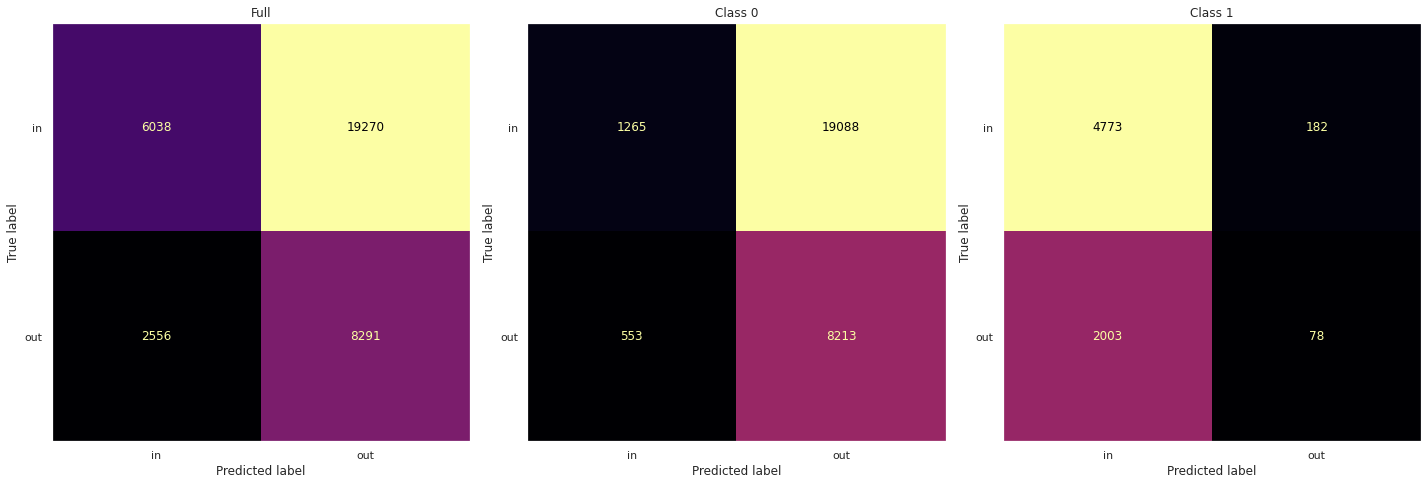

In [23]:
evaluate_attack(ensemble0, ensemble1, BB, BB_DATA)

##### Data: `Statistical` on `Noisy dataset` Attack: `Statistical` Explainer: `Decision Tree` Filter: `True`
Here the attack dataset is a newly generated statistical one, not the same used to create the `DTs`

In [24]:
PATH = Path('../../statistical_noisy_filter/adult/experiment_output/')
assert PATH.exists()

In [25]:
attack_0, attack_1, instances = load_attack_models(PATH)

In [26]:
ensemble0 = SoftVotingClassifier(attack_0)
ensemble1 = SoftVotingClassifier(attack_1)

report full
              precision    recall  f1-score   support

          in       0.70      0.26      0.38     25308
         out       0.30      0.75      0.43     10847

    accuracy                           0.40     36155
   macro avg       0.50      0.50      0.40     36155
weighted avg       0.58      0.40      0.39     36155


Class 0
              precision    recall  f1-score   support

          in       0.69      0.08      0.14     20353
         out       0.30      0.92      0.45      8766

    accuracy                           0.33     29119
   macro avg       0.50      0.50      0.30     29119
weighted avg       0.58      0.33      0.24     29119


Class 1
              precision    recall  f1-score   support

          in       0.71      0.98      0.82      4955
         out       0.34      0.02      0.04      2081

    accuracy                           0.70      7036
   macro avg       0.52      0.50      0.43      7036
weighted avg       0.60      0.70      0.59 

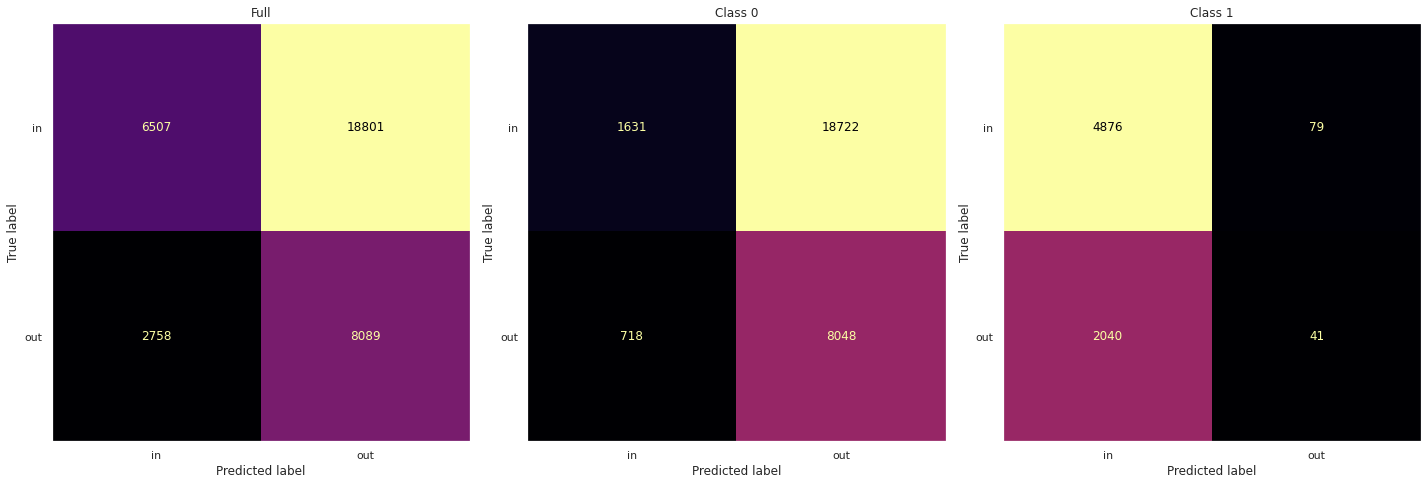

In [27]:
evaluate_attack(ensemble0, ensemble1, BB, BB_DATA)

##### Data: `Trepan` on `Black Box Train` Attack: `Noisy` Explainer: `Decision Tree` Filter: `False`

Here the trepan dataset was balanced and consisting of $\approx 7000$ elements.

In [28]:
PATH = Path('../../trepan/noisy/adult/experiment_output/')
assert PATH.exists()

In [29]:
attack_0, attack_1, instances = load_attack_models(PATH)

In [30]:
ensemble0 = SoftVotingClassifier(attack_0)
ensemble1 = SoftVotingClassifier(attack_1)

report full
              precision    recall  f1-score   support

          in       0.70      0.93      0.80     25308
         out       0.30      0.07      0.11     10847

    accuracy                           0.67     36155
   macro avg       0.50      0.50      0.46     36155
weighted avg       0.58      0.67      0.59     36155


Class 0
              precision    recall  f1-score   support

          in       0.70      0.92      0.79     20353
         out       0.30      0.08      0.13      8766

    accuracy                           0.67     29119
   macro avg       0.50      0.50      0.46     29119
weighted avg       0.58      0.67      0.59     29119


Class 1
              precision    recall  f1-score   support

          in       0.70      0.99      0.82      4955
         out       0.32      0.01      0.01      2081

    accuracy                           0.70      7036
   macro avg       0.51      0.50      0.42      7036
weighted avg       0.59      0.70      0.58 

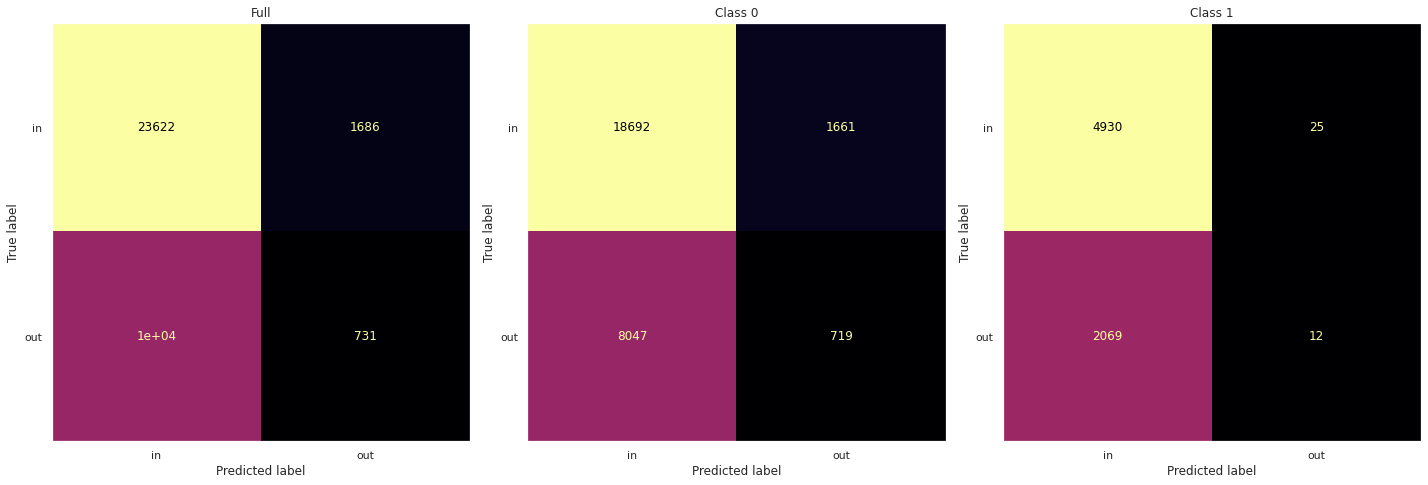

In [31]:
evaluate_attack(ensemble0, ensemble1, BB, BB_DATA)

##### Data: `Trepan` on `Black Box Train` Attack: `Noisy` Explainer: `Decision Tree` Filter: `True`
Here the trepan dataset was balanced and consisting of $\approx 7000$ elements.

In [32]:
PATH = Path('../../trepan/noisy_filtering/adult/experiment_output/')
assert PATH.exists()

In [33]:
attack_0, attack_1, instances = load_attack_models(PATH)

In [34]:
ensemble0 = SoftVotingClassifier(attack_0)
ensemble1 = SoftVotingClassifier(attack_1)

report full
              precision    recall  f1-score   support

          in       0.70      0.94      0.80     25308
         out       0.30      0.06      0.11     10847

    accuracy                           0.67     36155
   macro avg       0.50      0.50      0.45     36155
weighted avg       0.58      0.67      0.59     36155


Class 0
              precision    recall  f1-score   support

          in       0.70      0.92      0.80     20353
         out       0.30      0.08      0.12      8766

    accuracy                           0.67     29119
   macro avg       0.50      0.50      0.46     29119
weighted avg       0.58      0.67      0.59     29119


Class 1
              precision    recall  f1-score   support

          in       0.70      1.00      0.83      4955
         out       0.34      0.01      0.01      2081

    accuracy                           0.70      7036
   macro avg       0.52      0.50      0.42      7036
weighted avg       0.60      0.70      0.58 

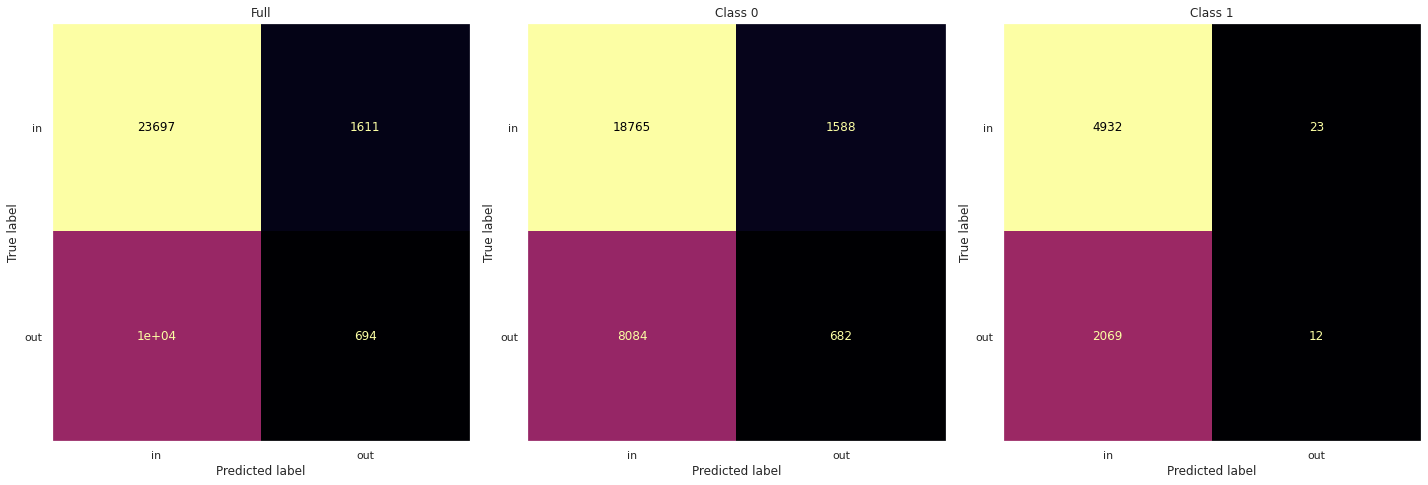

In [35]:
evaluate_attack(ensemble0, ensemble1, BB, BB_DATA)

##### Data: `Trepan` on `Black Box Train` Attack: `Statistical` on `Black Box Train` Explainer: `Decision Tree` Filter: `False`
Here the trepan dataset was balanced and consisting of $\approx 7000$ elements.

In [36]:
PATH = Path('../../trepan/statistical/adult/experiment_output/')
assert PATH.exists()

In [37]:
attack_0, attack_1, instances = load_attack_models(PATH)

In [38]:
ensemble0 = SoftVotingClassifier(attack_0)
ensemble1 = SoftVotingClassifier(attack_1)

report full
              precision    recall  f1-score   support

          in       0.70      0.96      0.81     25308
         out       0.31      0.05      0.08     10847

    accuracy                           0.68     36155
   macro avg       0.50      0.50      0.44     36155
weighted avg       0.58      0.68      0.59     36155


Class 0
              precision    recall  f1-score   support

          in       0.70      1.00      0.82     20353
         out       0.23      0.00      0.01      8766

    accuracy                           0.70     29119
   macro avg       0.47      0.50      0.41     29119
weighted avg       0.56      0.70      0.58     29119


Class 1
              precision    recall  f1-score   support

          in       0.71      0.79      0.75      4955
         out       0.31      0.23      0.27      2081

    accuracy                           0.62      7036
   macro avg       0.51      0.51      0.51      7036
weighted avg       0.59      0.62      0.60 

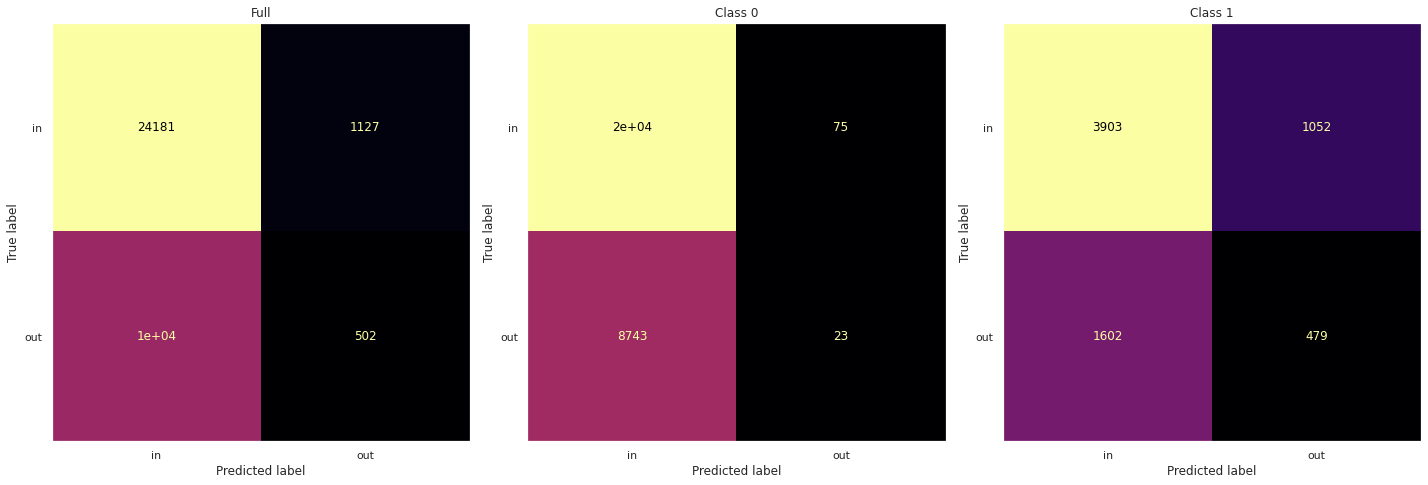

In [39]:
evaluate_attack(ensemble0, ensemble1, BB, BB_DATA)

##### Data: `Trepan` on `Black Box Train` Attack: `Statistical` on `Black Box Train` Explainer: `Decision Tree` Filter: `True`
Here the trepan dataset was balanced and consisting of $\approx 7000$ elements.

In [40]:
PATH = Path('../../trepan/statistical_filtering/adult/experiment_output/')
assert PATH.exists()

In [41]:
attack_0, attack_1, instances = load_attack_models(PATH)

In [42]:
ensemble0 = SoftVotingClassifier(attack_0)
ensemble1 = SoftVotingClassifier(attack_1)

report full
              precision    recall  f1-score   support

          in       0.70      0.99      0.82     25308
         out       0.32      0.01      0.02     10847

    accuracy                           0.70     36155
   macro avg       0.51      0.50      0.42     36155
weighted avg       0.59      0.70      0.58     36155


Class 0
              precision    recall  f1-score   support

          in       0.70      1.00      0.82     20353
         out       0.29      0.00      0.01      8766

    accuracy                           0.70     29119
   macro avg       0.50      0.50      0.41     29119
weighted avg       0.58      0.70      0.58     29119


Class 1
              precision    recall  f1-score   support

          in       0.71      0.98      0.82      4955
         out       0.34      0.03      0.05      2081

    accuracy                           0.70      7036
   macro avg       0.52      0.50      0.44      7036
weighted avg       0.60      0.70      0.59 

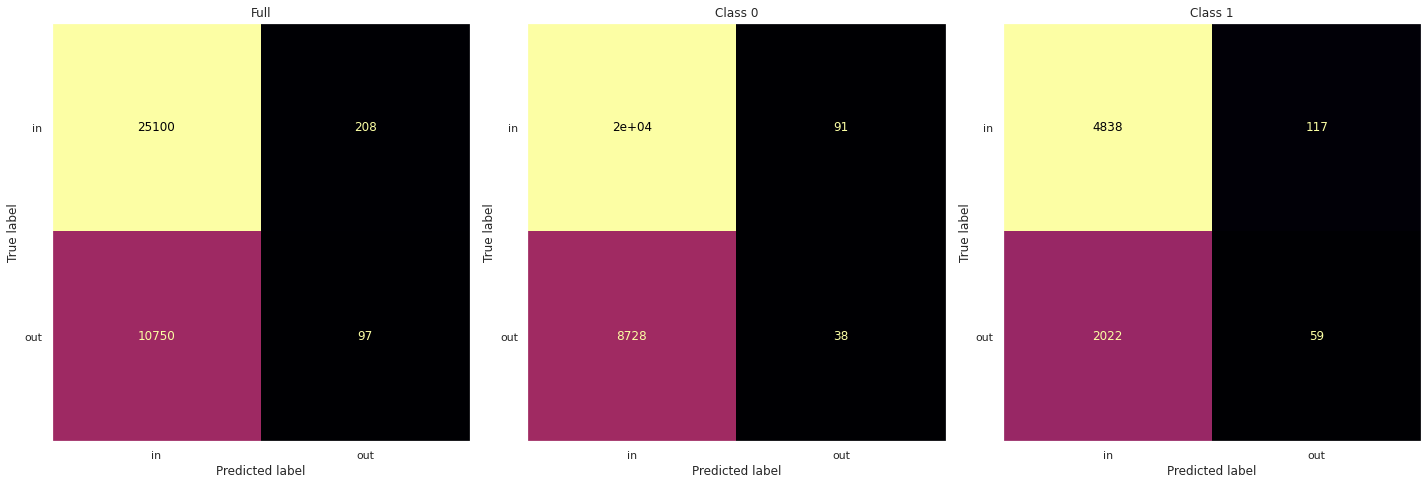

In [43]:
evaluate_attack(ensemble0, ensemble1, BB, BB_DATA)

##### Data: `Trepan` on `Black Box Train` Attack: `Statistical` on `Black Box Train` Explainer: `Decision Tree` Filter: `True`

Here I didn't balanced the dataset generated by trepan and for each `Decision Tree` I generated a dataset of $80,000$ elements.

In [44]:
PATH = Path('../../trepan/trepan_statistical_filtering_nobalanced/adult/experiment_output/')
assert PATH.exists()

In [45]:
attack_0, attack_1, instances = load_attack_models(PATH)

In [46]:
ensemble0 = SoftVotingClassifier(attack_0)
ensemble1 = SoftVotingClassifier(attack_1)

report full
              precision    recall  f1-score   support

          in       0.70      0.98      0.82     25308
         out       0.33      0.02      0.03     10847

    accuracy                           0.69     36155
   macro avg       0.51      0.50      0.43     36155
weighted avg       0.59      0.69      0.58     36155


Class 0
              precision    recall  f1-score   support

          in       0.70      0.98      0.82     20353
         out       0.33      0.02      0.04      8766

    accuracy                           0.69     29119
   macro avg       0.52      0.50      0.43     29119
weighted avg       0.59      0.69      0.58     29119


Class 1
              precision    recall  f1-score   support

          in       0.70      1.00      0.82      4955
         out       0.28      0.00      0.01      2081

    accuracy                           0.70      7036
   macro avg       0.49      0.50      0.42      7036
weighted avg       0.58      0.70      0.58 

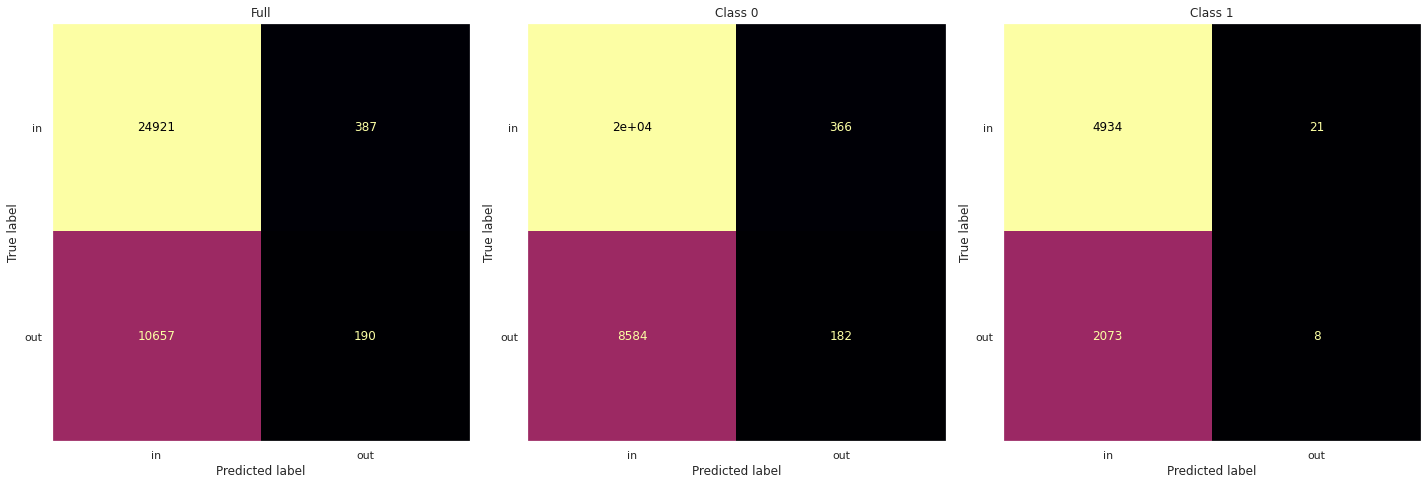

In [47]:
evaluate_attack(ensemble0, ensemble1, BB, BB_DATA)

##### Data: `Trepan` on `Black Box Train` Attack: `Statistical` on `Black Box Train` Explainer: `Decision Tree` Filter: `False`

Here I didn't balanced the dataset generated by trepan and for each `Decision Tree` I generated a dataset of $80,000$ elements.

In [4]:
PATH = Path('../../trepan/trepan_statistical_nobalanced/adult/experiment_output/')
assert PATH.exists()

In [5]:
attack_0, attack_1, instances = load_attack_models(PATH)

In [6]:
ensemble0 = SoftVotingClassifier(attack_0)
ensemble1 = SoftVotingClassifier(attack_1)

report full
              precision    recall  f1-score   support

          in       0.70      0.98      0.82     25308
         out       0.33      0.02      0.03     10847

    accuracy                           0.69     36155
   macro avg       0.51      0.50      0.43     36155
weighted avg       0.59      0.69      0.58     36155


Class 0
              precision    recall  f1-score   support

          in       0.70      0.98      0.82     20353
         out       0.33      0.02      0.04      8766

    accuracy                           0.69     29119
   macro avg       0.52      0.50      0.43     29119
weighted avg       0.59      0.69      0.58     29119


Class 1
              precision    recall  f1-score   support

          in       0.70      1.00      0.82      4955
         out       0.28      0.00      0.01      2081

    accuracy                           0.70      7036
   macro avg       0.49      0.50      0.42      7036
weighted avg       0.58      0.70      0.58 

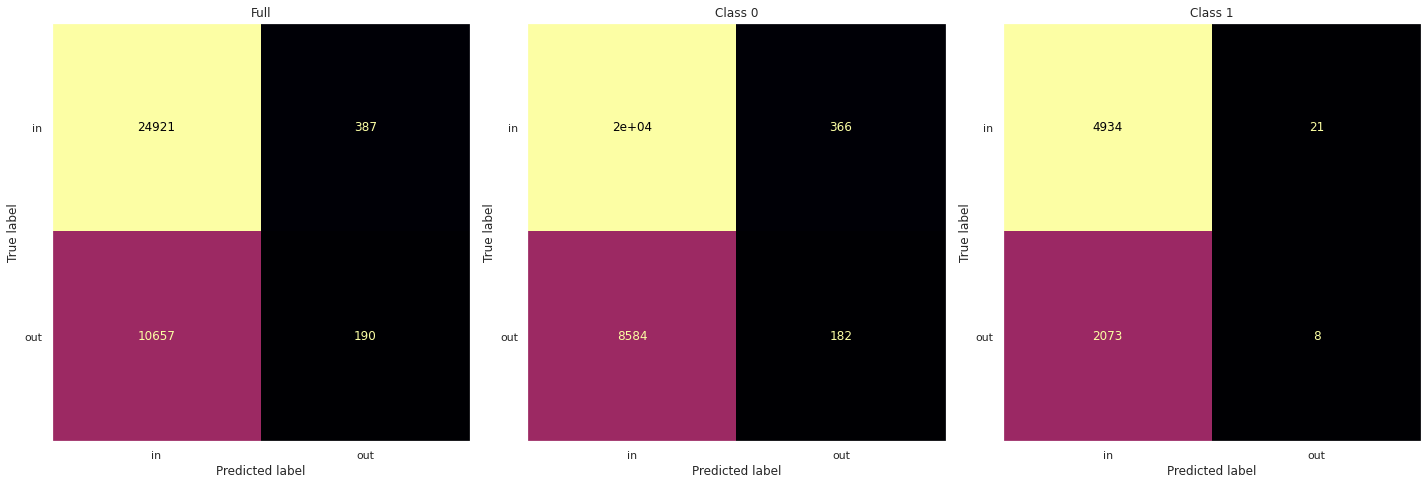

In [7]:
evaluate_attack(ensemble0, ensemble1, BB, BB_DATA)